In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
file_path = 'prostate.data'
X = loadtxt(file_path, skiprows=1)
with open(file_path, 'r') as myfile:
    label_names = myfile.readline().split()
y = X[:,-1]
X = X[:,0:-1]

In [4]:
import numpy as np

In [16]:
from numpy.linalg import inv

In [8]:
ytrain, ytest = y[0:50], y[50:]
Xtrain, Xtest = X[0:50], X[50:]

In [9]:
Xbar = mean(Xtrain, axis=0)
Xstd = std(Xtrain, axis=0)
ybar = mean(ytrain)
ytrain = ytrain - ybar
Xtrain = (Xtrain - Xbar) / Xstd

In [25]:
def ridge(X, y, d2):
    XTX = np.dot(X.T, X) + d2*eye(X.shape[1])
    XTXinv = inv(XTX)
    return np.dot( np.dot( XTXinv , X.T ) , y )

In [22]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show>

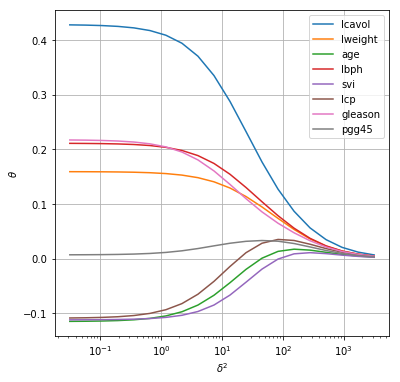

In [27]:
d2range = np.logspace(-1.5, 3.5, num=20)
thetas = np.array([ridge(Xtrain, ytrain, d2) for d2 in d2range])
plt.figure( figsize=(6,6) )
plt.xscale('log')
plt.grid()
plt.xlabel(r'$\delta^2$'); plt.ylabel(r'$\theta$')
plt.plot( d2range, thetas)
plt.legend( label_names )
plt.show


best delta: 13.5387618002


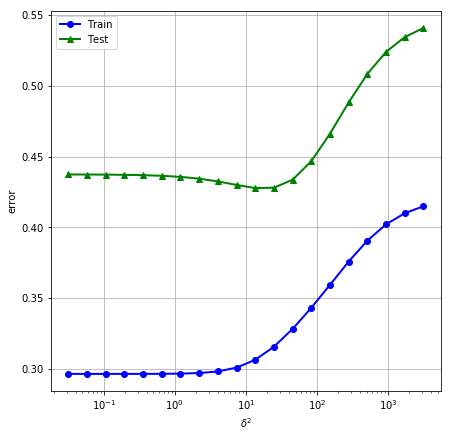

In [28]:
testerror = []
trainerror = []
min_err = None
for i, theta in enumerate(thetas):
    yhatstest = ybar + dot((Xtest - Xbar) / Xstd, theta)
    yhatstrain = ybar + dot(Xtrain, theta)
    trainerror.append(norm((ytrain + ybar) - yhatstrain, ord=2) / norm(ytrain + ybar, ord=2))
    testerror.append(norm(ytest - yhatstest, ord=2) / norm(ytest ,ord=2))
    max_err = max((trainerror[-1], testerror[-1]))
    if min_err == None or max_err < min_err:
        min_err = max_err
        best_delta = d2range[i]
print("best delta:", best_delta)
figure(figsize=(7,7))
xscale('log')
grid()
xlabel(r'$\delta^2$'); ylabel('error')
plot(d2range, trainerror, '-bo', linewidth=2)
plot(d2range, testerror, '-g^', linewidth=2)
legend(["Train", "Test"])
show()

In [77]:
K.shape

(10, 10)

In [119]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl

""" This is code for simple GP regression. It assumes a zero mean GP Prior """


# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()


# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

(50, 50)


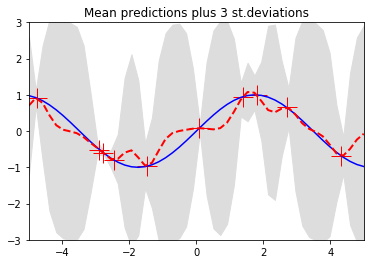

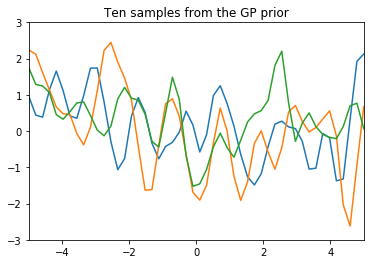

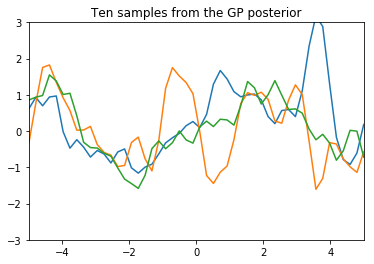

In [120]:

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)


# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
print( L.shape)
f_prior = np.dot(L, np.random.normal(size=(n,3)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')

pl.show()

In [115]:
K_.shape

(50, 50)